In [1]:
import sys
if ".." not in sys.path:
    sys.path.append("..")

In [95]:
import matplotlib.pyplot as plt
import numpy as np
from utils.colors import *

plt.rc('xtick', labelsize=8)    # fontsize of the tick labels
plt.rc('ytick', labelsize=8)    # fontsize of the tick labels
plt.rc('legend', fontsize=8)    # legend fontsize

rpom_biomass = {"Protein": 0.561521914,
                "RNA": 0.093597842,
                "DNA": 0.05136379,
                "Lipid": 0.095950926,
                "PHB": 0.091372857,
                "Murein": 0.026355529,
                "Ions": 0.009825009,
                "Cofactors": 0.001524574,
                "Other": 0.068487558}

ecoli_biomass = {"Protein": 0.55,
                 "RNA": 0.2053,
                 "DNA": 0.031,
                 "Lipid": 0.091,
                 "Glycogen": 0.025,
                 "Murein": 0.025,
                 "Other": 0.073}

biomass_colors = {"Protein": C_PROTEIN,
                  "Lipid": C_LIPID,
                  "RNA": C_RNA,
                  "PHB": C_PHB,
                  "Glycogen": C_PHB,
                  "DNA": C_DNA,
                  "Murein": C_MUREIN,
                  "Other": BACKGROUND_GRAY}

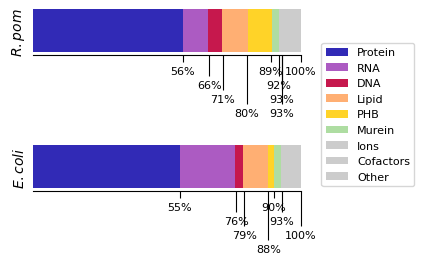

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1)


for ax, sp, biomass in zip([ax1, ax2],
                           ["R. pom", "E. coli"],
                           [rpom_biomass, ecoli_biomass]):

    # Draw bars, text
    total = 0
    for component, proportion in biomass.items():
        ax.barh(0,
            proportion,
            left=total,
            label=component if sp == "R. pom" else None,
            color=biomass_colors.get(component, BACKGROUND_GRAY))
        # if proportion > 0.08:
        #     ax.text(total + proportion / 2, 0, f"{proportion:.0%}", ha="center", va="center")
        total += proportion

    ax.set_yticks([])

    xticks = np.round(np.cumsum(list(biomass.values())), 2)
    ax.set_xticks(xticks, [f"{x:.0%}" for x in xticks])
    for i, tick in enumerate(ax.xaxis.get_major_ticks()):
        ticklen = 5 + 10*(i % 4)
        tick.set_pad(ticklen)
        tick.tick1line.set_markersize(ticklen)

    ax.set_xlim(0, 1)
    ax.set_ylim(-0.45, 0.4)
    ax.set_ylabel(f"$\\it{{{sp}}}$", fontsize=10)

    for spine in ax.spines:
        if spine == "bottom":
            continue
        ax.spines[spine].set_visible(False)

fig.legend(loc="center right", bbox_to_anchor=(1.35, 0.5))

fig.tight_layout()
fig.subplots_adjust(hspace=2)
fig.set_size_inches(3, 2.25)

fig.savefig("biomass_composition.svg")

In [121]:
ax.xaxis.get_major_ticks()

In [99]:
tick

In [78]:
np.cumsum(list(biomass.values()))[:-1]

array([0.55  , 0.7553, 0.7863, 0.8773, 0.9023, 0.9273])